# Lista 5 - Exercício 2

Gere um conjunto de dados bidimensionais $X$ com 400 pontos situados em torno de dois círculos concêntricos. Os primeiros  200 devem estar em torno de um círculo de raio 3 centrado em (0, 0). Os demais devem estar em torno de um círculo de raio 6. Aplique um algoritmo de clustering espectral com medida de similaridade Gaussiana considerando $\varepsilon = 1.5$ e $\sigma = 2$ e plote os resultados. Altere $\varepsilon$ e $\sigma$ e rode novamente. Qual o efeito de $\varepsilon$ e $\sigma$ nos resultados?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from sklearn.cluster import SpectralClustering

def points_in_circle(radius, n_points):
    return np.asarray([[np.cos(2*np.pi/n_points*x)*radius, np.sin(2*np.pi/n_points*x)*radius] for x in range(0,n_points)])

N = 200

X = np.vstack([points_in_circle(3, N), points_in_circle(6, N)])
# Add some gaussian noise
X += multivariate_normal([0, 0], np.identity(2)*0.1, N*2)

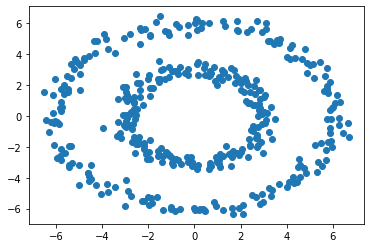

In [2]:
plt.scatter(X[:, 0], X[:, 1]);

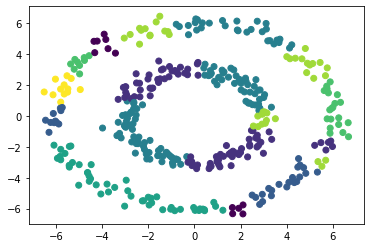

In [3]:
spectral = SpectralClustering(affinity='rbf', eigen_tol=1.5, gamma=2, assign_labels='discretize').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=spectral.labels_);

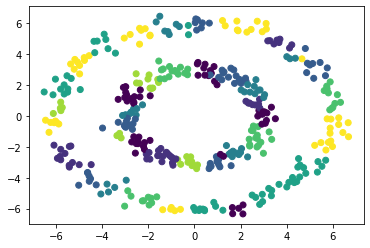

In [4]:
spectral = SpectralClustering(affinity='rbf', eigen_tol=3, gamma=5, assign_labels='discretize').fit(X)
plt.scatter(X[:, 0], X[:, 1], c=spectral.labels_);

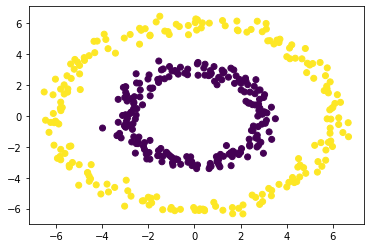

In [5]:
spectral = SpectralClustering(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=spectral.labels_);